All of this code is from the tensorflow website

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
data_dir = 'data/tomato/'

In [3]:
batch_size = 50
img_height = 256
img_width = 256

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 18160 files belonging to 10 classes.
Using 14528 files for training.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 18160 files belonging to 10 classes.
Using 3632 files for validation.


In [10]:
len(train_ds)

291

In [14]:
for i in train_ds:
    one = i
    print(i)
    break

(<tf.Tensor: shape=(50, 256, 256, 3), dtype=float32, numpy=
array([[[[144., 139., 145.],
         [138., 133., 139.],
         [142., 137., 143.],
         ...,
         [ 98.,  95., 102.],
         [139., 136., 143.],
         [109., 106., 113.]],

        [[146., 141., 147.],
         [127., 122., 128.],
         [120., 115., 121.],
         ...,
         [ 89.,  86.,  93.],
         [106., 103., 110.],
         [116., 113., 120.]],

        [[180., 175., 181.],
         [129., 124., 130.],
         [112., 107., 113.],
         ...,
         [106., 103., 110.],
         [101.,  98., 105.],
         [100.,  97., 104.]],

        ...,

        [[ 47.,  51.,  54.],
         [ 48.,  52.,  55.],
         [ 48.,  52.,  55.],
         ...,
         [ 78.,  82.,  85.],
         [ 80.,  84.,  87.],
         [ 83.,  87.,  90.]],

        [[ 47.,  51.,  54.],
         [ 51.,  55.,  58.],
         [ 55.,  59.,  62.],
         ...,
         [ 76.,  80.,  81.],
         [ 79.,  83.,  84.],
       

In [18]:
one[0]

<tf.Tensor: shape=(50, 256, 256, 3), dtype=float32, numpy=
array([[[[144., 139., 145.],
         [138., 133., 139.],
         [142., 137., 143.],
         ...,
         [ 98.,  95., 102.],
         [139., 136., 143.],
         [109., 106., 113.]],

        [[146., 141., 147.],
         [127., 122., 128.],
         [120., 115., 121.],
         ...,
         [ 89.,  86.,  93.],
         [106., 103., 110.],
         [116., 113., 120.]],

        [[180., 175., 181.],
         [129., 124., 130.],
         [112., 107., 113.],
         ...,
         [106., 103., 110.],
         [101.,  98., 105.],
         [100.,  97., 104.]],

        ...,

        [[ 47.,  51.,  54.],
         [ 48.,  52.,  55.],
         [ 48.,  52.,  55.],
         ...,
         [ 78.,  82.,  85.],
         [ 80.,  84.,  87.],
         [ 83.,  87.,  90.]],

        [[ 47.,  51.,  54.],
         [ 51.,  55.,  58.],
         [ 55.,  59.,  62.],
         ...,
         [ 76.,  80.,  81.],
         [ 79.,  83.,  84.],
        

In [6]:
class_names = train_ds.class_names
print(class_names)

['bacterial_spot', 'early_blight', 'healthy', 'late_blight', 'leaf_mold', 'leaf_septoria', 'mosaic_virus', 'spider_mites', 'target_spot', 'yeallow_leaf_curl_virus']


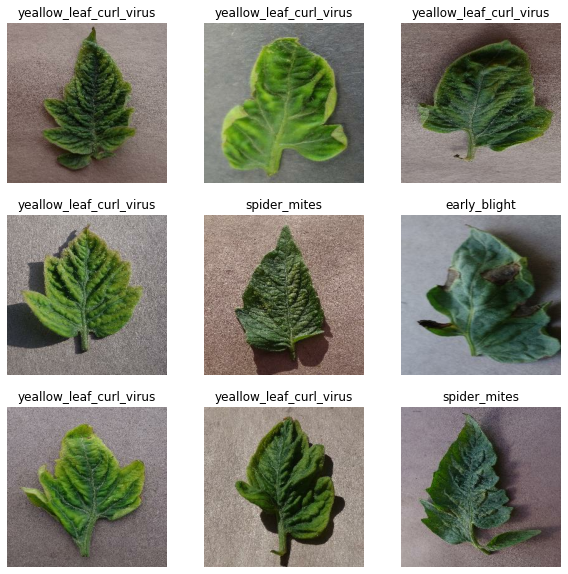

In [7]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [8]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
  
    break


(50, 256, 256, 3)
(50,)


In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [10]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [11]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [15]:
num_classes = 10

In [21]:


model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./256, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 32, 32, 64)       

In [24]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/10
454/454 [==============================] - 224s 492ms/step - loss: 1.3681 - accuracy: 0.5549 - val_loss: 0.4044 - val_accuracy: 0.8604
Epoch 2/10
454/454 [==============================] - 224s 494ms/step - loss: 0.3229 - accuracy: 0.8916 - val_loss: 0.3814 - val_accuracy: 0.8687
Epoch 3/10
454/454 [==============================] - 221s 486ms/step - loss: 0.1964 - accuracy: 0.9361 - val_loss: 0.3720 - val_accuracy: 0.8827
Epoch 4/10
454/454 [==============================] - 219s 483ms/step - loss: 0.1074 - accuracy: 0.9625 - val_loss: 0.3066 - val_accuracy: 0.9020
Epoch 5/10
454/454 [==============================] - 222s 489ms/step - loss: 0.0845 - accuracy: 0.9701 - val_loss: 0.2612 - val_accuracy: 0.9262
Epoch 6/10
454/454 [==============================] - 222s 488ms/step - loss: 0.0622 - accuracy: 0.9787 - val_loss: 0.2832 - val_accuracy: 0.9284
Epoch 7/10
454/454 [==============================] - 223s 491ms/step - loss: 0.0485 - accuracy: 0.9855 - val_loss: 0.4248 -

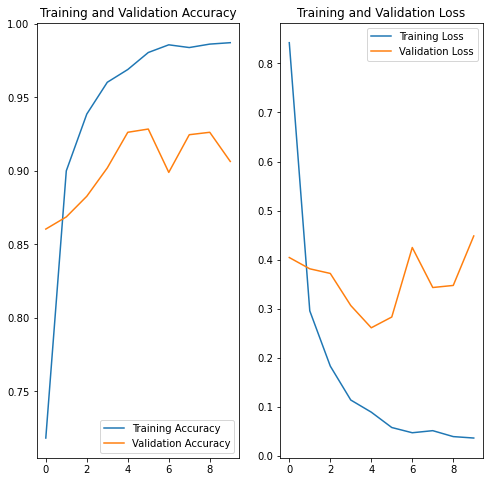

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [12]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

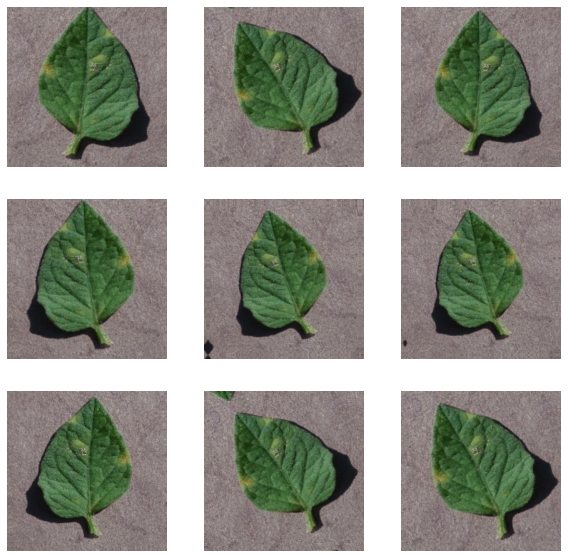

In [13]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [16]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 256, 256, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 64)       

In [19]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
 63/291 [=====>........................] - ETA: 2:37 - loss: 2.0896 - accuracy: 0.2989

KeyboardInterrupt: 

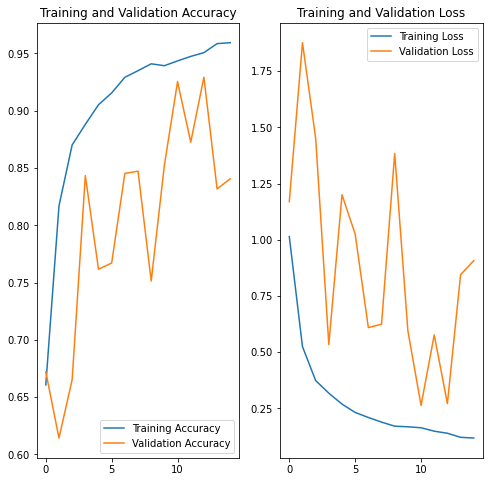

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()